In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import MinMaxScaler


In [2]:
# setting random state
np.random.seed(8)

In [33]:
# Data set generations
class GenDataset():

    def __int__(self):
        self.X = None
        self.y = None

    def blobs(self, n_samples=100, centers=3, n_features=2):
        self.X, self.y = make_blobs(n_samples=n_samples, centers=centers, 
                                    n_features=n_features, random_state=10)
        return self.X, self.y

    def cirlces(self, n_samples=100, noise=None, factor=0.8):
        self.X, self.y = make_circles(n_samples=n_samples, shuffle=True, 
                                        noise=noise, factor=factor, random_state=10)
        return self.X, self.y

    def moons(self, n_samples=100, noise=None):
        self.X, self.y = make_moons(n_samples=n_samples, shuffle=True, 
                                    noise=noise, random_state=10)
        return self.X, self.y

In [34]:
# Generating data
data_gen = GenDataset()
X, y = data_gen.blobs(n_samples=500)

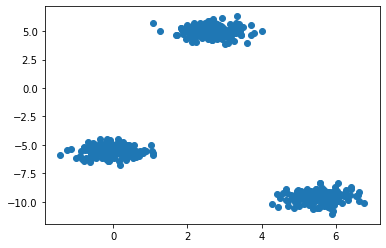

In [35]:
# plotting  clusters
plt.scatter(X[:,0], X[:,1])

In [16]:
y

array([1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1,

In [36]:
# Scaling

def scaling(x):
    x_min = np.amin(x, axis=0)
    x_max = np.amax(x, axis=0)
    return((x-x_min)/(x_max-x_min))


In [37]:
X = scaling(X)

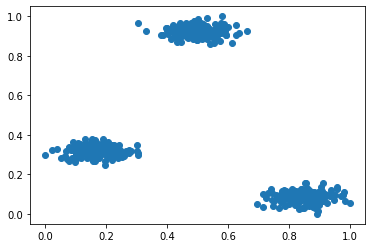

In [38]:
# plotting  clusters after scaling
plt.scatter(X[:,0], X[:,1])

In [39]:
# kmeans clustering model

class k_means():


    def __init__(self, k):
        self.k = k


    def initialize_centroids_random(self, X):
        # getting initial centroids/centers using random method
        num_rows = X.shape[0]
        centroid_indices =   np.random.choice(num_rows, size=self.k, replace=False)
        centroids = X[centroid_indices, :]
        return centroids

    def initialize_centroid_kmeansplus(self, X):
        # getting initial centroids using Kmeans++ method
        centroids = [X[np.random.randint(X.shape[0])]]
        for i in range(self.k-1):
            


    def train(self, X, k=3, epochs=1000, threshold=0.0001):

        """ Return the centroids numpy array, dictionary 
            with key as centroid number and values
            as list of assigned elements
        """
        

        num_rows = X.shape[0]
        num_cols = X.shape[1]
        

        # getting initial centroids/centers
        centers = self.initialize_centroids_random(X)

        # creating iterations 
        for _ in range(epochs):
            # keeping track of elements in clusters
            labeled = {}
            for i in range(k):
                labeled[i] = []

            # assigning elements to the centroids 
            for row in X:
                current_row = row
                distances = []
                for center in centers:
                    distances.append(np.linalg.norm(current_row-center))
                its_center = distances.index(min(distances))
                labeled[its_center].append(current_row)

            # new updated centroids
            new_centers = np.empty(shape=(k, num_cols))
            for center in range(k):
                new_centers[center] = np.average(labeled[center], axis=0)

            # checking threshold
            # if np.centers-new_centers
        
        centers = new_centers
        print(centers)

        # arranging labels for output
        y_output = np.empty(shape=(num_rows, 1))
        # print(labeled)
        for key, value in labeled.items():
            for each in value:
                try:
                    index_y = np.where(X, each)
                    y_output[index_y] = key
                    print(index_y, key)
                except:
                    pass
        



        
        return new_centers , labeled, y_output


    


In [40]:
model = k_means()
centroid, labeled, y = k_means.train(X)

[[0.49936111 0.92429196]
 [0.64062974 0.15667144]
 [0.12624772 0.32662867]]


In [21]:
obj.plot_graph(centroid,labeled)


array([[0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [0.e+000],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.e-324],
       [5.

In [34]:
centroid

array([[0.52984741, 0.27089278],
       [0.53622411, 0.89616961],
       [0.26773587, 0.70343693]])

array([0.46993335, 0.80837469])

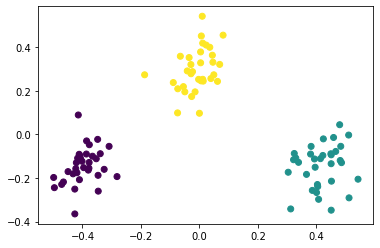

In [12]:
from sklearn.decomposition import PCA

pca_x = scaling(X)

pca = PCA(n_components=2).fit(pca_x)
pca_2d = pca.transform(pca_x)

plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
plt.show()

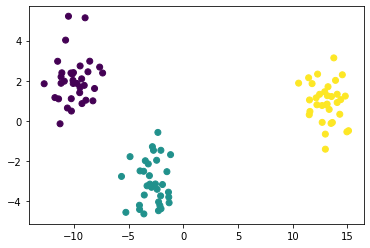

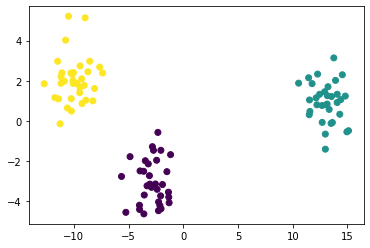

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(X)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()